In [2]:

%load_ext autoreload
%autoreload 2
# importing libraries
import matplotlib.pyplot as plt
import numpy as np
import math

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from run_generate_times  import read_spans , get_snp_dfs , find_span_mosaic, find_centers
from TimeFinder import TimeFinder

path = './result/from0_to47.txt'


In [4]:
spans = read_spans(path)
mutation_df = get_snp_dfs()

population = [p for p in mutation_df['sample'].unique()]
muts = [p for p in mutation_df['position'].unique()]

#vcf  --from-bp 48055079 --to-bp 48085036 

centers = find_centers(muts, 48055079, 48085036 )
mosaics = []
for s in spans:
    S, E = find_span_mosaic(centers, s[0], s[1])
    mosaics.append([S, E, s[2]])



Parsing file ./result/from0_to47.txt


In [5]:

%load_ext autoreload
%autoreload 2
tf = TimeFinder(mosaics, population, mutation_df)

# times = tf.find_all_times()
# file_name = f"infer_time_{path.split('/')[-1]}"
# with open(f'./result/{file_name}', 'w') as f:
#     f.write("%s\n" % times)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
h = mosaics[0]
tf.find_mrca_time(h[0], h[1], h[2])

/usr/local/lib/python3.9/site-packages/tsdate/util.py:138: RuntimeWarning: Different number of sites after preprocessing. Try using **{'filter_sites:' False} to avoid this
  warnings.warn(


7903.40217285556

In [7]:
mn = 999999999999, None
mx = 0, None
for h in mosaics:
    size = h[1]-h[0]
    if size< mn[0]:
        mn = size, h
    if size> mx[0]:
        mx = size, h


In [8]:
x = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9]
y1 = []
y2 = []
for rate in x:
    tm = tf.find_mrca_time(mn[1][0], mn[1][1], mn[1][2], rate)
    print(f'for small mosaic for mutation rate {rate}, time is {tm}')
    y1.append(tm)
    tm = tf.find_mrca_time(mx[1][0], mx[1][1], mx[1][2], rate)
    y2.append(tm)


for small mosaic for mutation rate 0.01, time is 0.4464316428327859
for small mosaic for mutation rate 0.001, time is 3.5831889820399594
for small mosaic for mutation rate 0.0001, time is 28.014982186940024
for small mosaic for mutation rate 1e-05, time is 200.00928279903164
for small mosaic for mutation rate 1e-06, time is 1322.8173738950793
for small mosaic for mutation rate 1e-07, time is 6903.21652546597
for small mosaic for mutation rate 1e-08, time is 22422.46889150293
for small mosaic for mutation rate 1e-09, time is 35985.006530348976


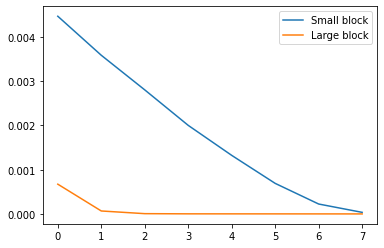

In [10]:

# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# create data
xx = [t for t in range(len(x))]
Y1 = []
Y2 = []
for i in range(len(xx)):
    Y1.append(y1[i]*x[i])
    Y2.append(y2[i]*x[i])
# plot lines
plt.plot(xx, Y1, label = "Small block")
plt.plot(xx, Y2, label = "Large block")
plt.legend()
plt.show()

In [36]:
y1

[0.4464316428327859,
 3.5831889820399594,
 28.014982186940024,
 200.00928279903164,
 1322.8173738950793,
 6903.21652546597,
 22422.46889150293,
 35985.006530348976]

In [43]:
[t for t in range(len(x))]

[0, 1, 2, 3, 4, 5, 6, 7]

In [12]:
mx[1]

[48055896.0,
 48059428.0,
 ['HG03485_1',
  'HG02185_1',
  'HG03871_0',
  'HG01612_1',
  'NA20291_0',
  'NA20757_0',
  'HG02870_1',
  'NA18858_0',
  'HG00632_0',
  'NA19102_1',
  'NA19214_0',
  'NA19038_1',
  'NA19707_1',
  'NA12275_1',
  'NA19238_1',
  'HG03123_1',
  'HG01396_0',
  'NA19314_1',
  'NA11831_0',
  'HG03518_0',
  'HG03432_1',
  'NA12761_1',
  'HG02774_0',
  'NA19457_1',
  'NA20507_1',
  'HG03998_1',
  'HG01668_1',
  'HG03595_0',
  'HG02642_1',
  'HG01531_1',
  'HG00158_0',
  'HG01205_0',
  'NA11930_0',
  'NA12006_0',
  'NA18917_1',
  'NA12748_1',
  'HG01188_0',
  'HG03007_0',
  'NA19394_0',
  'NA20754_0',
  'HG02554_1',
  'NA20804_0',
  'NA20539_0',
  'HG01859_0',
  'HG03072_1',
  'HG02979_1',
  'HG01694_1',
  'HG02837_1',
  'HG00265_0',
  'NA20529_0',
  'HG01979_1',
  'NA20587_1',
  'HG03419_1',
  'HG03470_1',
  'NA19320_1',
  'NA20856_1',
  'HG02731_1',
  'HG02595_1',
  'HG01064_1',
  'HG00851_1',
  'NA20806_1',
  'HG03048_0',
  'HG00332_0',
  'HG03433_0',
  'HG02006_0',

In [14]:
for x in 

48055079


[48055079, 48055373.0, ['HG02610_0', 'HG02643_1', 'HG04100_1']]

In [32]:
def find_mutation_count(mosaic):
    cm = [m for m in muts if m>=mosaic[0] and m<mosaic[1]]
    return len(cm)

target_mosaic = mosaics[10]
max_centers = [c for c in centers if c<=target_mosaic[1] and c>=target_mosaic[0]]

smaller_mosaics = []
for i in range(len(max_centers)-1):
    H = [m for m in mosaics if m[0] == max_centers[i] and m[1] == max_centers[i+1]][0]
    print(H)
    smaller_mosaics.append(H)


[48055079, 48055094.5, []]
[48055094.5, 48055102.5, []]
[48055102.5, 48055178.5, []]
[48055178.5, 48055248.5, []]
[48055248.5, 48055272.0, []]
[48055272.0, 48055312.5, []]
[48055312.5, 48055335.5, []]
[48055335.5, 48055348.5, []]
[48055348.5, 48055360.5, []]
[48055360.5, 48055368.0, []]
[48055368.0, 48055373.0, []]


In [33]:
find_mutation_count(target_mosaic)

11

In [35]:
for sm in smaller_mosaics:
    print(find_mutation_count(sm))

1
1
1
1
1
1
1
1
1
1
1


In [38]:
from BlockSelector import find_mosaic_score

spans[0]  # Start, End, # Remove, Time, # SNPs
scores = []
for sm in smaller_mosaics:
    tm = tf.find_mrca_time(mx[1][0], mx[1][1], mx[1][2], rate)

    s = find_mosaic_score([sm[0], sm[1], len(sm[2]), 1.5, find_mutation_count(sm)], 0.6)
    scores.append(s)


In [39]:
scores

[0.00045,
 0.00045,
 0.00045,
 0.00045,
 0.00045,
 0.00045,
 0.00045,
 0.00045,
 0.00045,
 0.00045,
 0.00045]